### chemcalc API와 실제데이터를 활용해 가능한 분자 구조를 찾아보고 자동으로 그려보쟈!

#### 1. pandas를 활용해 데이터를 불러오고 전처리

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('data/Example 1.xlsx',index_col = False)

In [3]:
df

,1,85.0281,15505,92.6,3588,1.7,0.0055,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,2,85.1014,16848,16.6,643,0.3,0.0051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,86.0599,15149,19.4,753,0.4,0.0057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,87.0438,18891,17,663,0.3,0.0046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,88.0755,15455,55.3,2156,1.1,0.0057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,89.0593,17062,5.5,215,0.1,0.0052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2656,2654,1001.8604,15828,1.8,227,0.1,0.0633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2657,2655,1002.8672,16946,2.5,310,0.2,0.0592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2658,2656,1003.8993,16053,2.3,290,0.1,0.0625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2659,691,354.1386+'[Sorting_0529_Fe Complexes .xlsx]#4 ...,12797,27.1,2249,1.1,0.0277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.iloc[:,1:7]

In [5]:
df = df.dropna()

In [6]:
df.columns = ['var1','var2','var3','var4','var5','var6']

In [7]:
new_var1 = []
for i in df.loc[:,'var1']:
    try:
        i = float(i)
        new_var1.append(i)
    except:
        print(i)
        new_var1.append(i)

354.1386+'[Sorting_0529_Fe Complexes .xlsx]#4 Ala2+Fe+Glu2'!$B$48:$G$692+'[Sorting_0529_Fe Complexes .xlsx]#4 Ala2+Fe+Glu2'!$B$126:$G$692
m/z


In [8]:
df['var1'] = new_var1

In [9]:
df

,var1,var2,var3,var4,var5,var6
0,85.1014,16848,16.6,643,0.3,0.0051
1,86.0599,15149,19.4,753,0.4,0.0057
2,87.0438,18891,17,663,0.3,0.0046
3,88.0755,15455,55.3,2156,1.1,0.0057
4,89.0593,17062,5.5,215,0.1,0.0052
...,...,...,...,...,...,...
2656,1001.8604,15828,1.8,227,0.1,0.0633
2657,1002.8672,16946,2.5,310,0.2,0.0592
2658,1003.8993,16053,2.3,290,0.1,0.0625
2659,354.1386+'[Sorting_0529_Fe Complexes .xlsx]#4 ...,12797,27.1,2249,1.1,0.0277


#### 2. API를 활용해 var1의 물성에서 가능한 분자식를 찾아보자.. 세부설정은 화학지식이 필요

In [10]:
import urllib
import json
import requests

In [11]:
def findMfByMass(mass):
    chemcalcURL = 'https://www.chemcalc.org/chemcalc/em'
    mfRange = 'C0-100H0-100N0-10O0-10'
    options = {'mfRange': mfRange,
               'monoisotopicMass': mass,
              }

    data =  requests.get(chemcalcURL, options).json()
    return data

In [12]:
data = findMfByMass(df['var1'][0])

In [13]:
data = pd.DataFrame(data['results'])

In [14]:
data = data.sort_values(by = 'error',ascending= True) # 에러가 가장 작은 분자구조를 선택해보쟈
data = data.reset_index(drop = True)
mf = data.loc[0,['mf']]
mf = mf.values[0]
mf

'C3H3NO2'

In [15]:
df['var1'].values

array([85.1014, 86.0599, 87.0438, ..., 1003.8993,
       "354.1386+'[Sorting_0529_Fe Complexes .xlsx]#4 Ala2+Fe+Glu2'!$B$48:$G$692+'[Sorting_0529_Fe Complexes .xlsx]#4 Ala2+Fe+Glu2'!$B$126:$G$692",
       'm/z'], dtype=object)

In [18]:
from tqdm import tqdm

In [20]:
df

,var1,var2,var3,var4,var5,var6
0,85.1014,16848,16.6,643,0.3,0.0051
1,86.0599,15149,19.4,753,0.4,0.0057
2,87.0438,18891,17,663,0.3,0.0046
3,88.0755,15455,55.3,2156,1.1,0.0057
4,89.0593,17062,5.5,215,0.1,0.0052
...,...,...,...,...,...,...
2656,1001.8604,15828,1.8,227,0.1,0.0633
2657,1002.8672,16946,2.5,310,0.2,0.0592
2658,1003.8993,16053,2.3,290,0.1,0.0625
2659,354.1386+'[Sorting_0529_Fe Complexes .xlsx]#4 ...,12797,27.1,2249,1.1,0.0277


In [21]:
mf_list = []
for var1 in tqdm(df['var1'].values):
    data = findMfByMass(var1)
    data = pd.DataFrame(data['results'])
    data = data.sort_values(by = 'error',ascending= True) # 에러가 가장 작은 분자구조를 선택해보쟈
    data = data.reset_index(drop = True)
    mf = data.loc[0,['mf']]
    mf = mf.values[0]
    mf_list.append(mf)

 57%|████████████████████████████████████████████▋                                 | 1522/2656 [36:43<27:21,  1.45s/it]


KeyboardInterrupt: 

In [22]:
mf_list

['C3H3NO2',
 'C3H2O3',
 'C2HNO3',
 'C2O4',
 'C2H3NO3',
 'C2H2O4',
 'C2H2O4',
 'C2H2O4',
 'CHNO4',
 'CO5',
 'HNO5',
 'O6',
 'H3NO5',
 'H3NO5',
 'H2O6',
 'H2O6',
 'H2O6',
 'H2O6',
 'C3HNO3',
 'C3O4',
 'C3O4',
 'C3H3NO3',
 'C3H3NO3',
 'C3H2O4',
 'C3H2O4',
 'C2HNO4',
 'C2HNO4',
 'C2O5',
 'C2H3NO4',
 'C2H2O5',
 'CHNO5',
 'CO6',
 'CH3NO5',
 'CH3NO5',
 'CH3NO5',
 'CH2O6',
 'HNO6',
 'HNO6',
 'O7',
 'O7',
 'H3NO6',
 'H3NO6',
 'H3NO6',
 'H2O7',
 'H2O7',
 'C3HNO4',
 'C3HNO4',
 'C3O5',
 'C3O5',
 'C3H3NO4',
 'C3H3NO4',
 'C3H3NO4',
 'C3H2O5',
 'C3H2O5',
 'C2O6',
 'C2H3NO5',
 'C2H2O6',
 'CHNO6',
 'CO7',
 'CH3NO6',
 'CH2O7',
 'HNO7',
 'HNO7',
 'HNO7',
 'O8',
 'O8',
 'O8',
 'O8',
 'H3NO7',
 'H2O8',
 'H2O8',
 'H2O8',
 'H2O8',
 'C3O6',
 'C3O6',
 'C3O6',
 'C3O6',
 'C3H3NO5',
 'C3H3NO5',
 'C3H3NO5',
 'C3H2O6',
 'C3H2O6',
 'C3H2O6',
 'C2HNO6',
 'C2HNO6',
 'C2O7',
 'C2H3NO6',
 'C2H3NO6',
 'C2H2O7',
 'CHNO7',
 'CO8',
 'CH3NO7',
 'CH3NO7',
 'CH2O8',
 'CH2O8',
 'HNO8',
 'HNO8',
 'HNO8',
 'O9',
 'O9',
 'H3NO8',


In [26]:
df['mf'] = mf_list

C:\Users\NH\AppData\Local\Temp\ipykernel_20712\1695959150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mf'] = mf_list


In [33]:
df = df.loc[:,['var1','var4','mf']]

In [36]:
df.columns = ['mz','intensity','formula']

In [39]:
df = df[['formula','intensity','mz']]

In [40]:
df.to_csv('data/Example 3.csv',index = False)

#### 3. 분자식에서 나타날 수 있는 분자구조를 찾아보쟈

In [ ]:
!pip install pubchempy

In [ ]:
import pubchempy as pcp

In [214]:
mf = df['mf'][0]

In [215]:
mf

'C3H3NO2'

In [217]:
results = pcp.get_compounds(mf, 'formula',as_dataframe = True) # 시간 상단 소요

In [219]:
len(results.isomeric_smiles)

97

In [223]:
smiles = results.isomeric_smiles.values[0]

In [224]:
smiles

'C(C#N)C(=O)O'

In [225]:
smiles_list = []
for mf in df['mf'].values:
    results = pcp.get_compounds(mf, 'formula',as_dataframe = True)
    smiles = results.isomeric_smiles.values[0]
    smiles_list.append(smiles)b

In [226]:
df['smiles'] = smiles_list

C:\Users\NH\AppData\Local\Temp\ipykernel_5776\102915552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smiles'] = smiles_list


In [227]:
df

,var1,var2,var3,var4,var5,var6,mf,smiles
0,85.1014,16848,16.6,643,0.3,0.0051,C3H3NO2,C(C#N)C(=O)O
1,86.0599,15149,19.4,753,0.4,0.0057,C3H2O3,C1=COC(=O)O1
2,87.0438,18891,17,663,0.3,0.0046,C2HNO3,C1=NC(=O)OO1
3,88.0755,15455,55.3,2156,1.1,0.0057,C2O4,C(=O)(C(=O)[O-])[O-]
4,89.0593,17062,5.5,215,0.1,0.0052,C2H3NO3,C(=O)(C(=O)O)N
5,89.9639,16388,25,979,0.5,0.0055,C2H2O4,C(=O)(C(=O)O)O
6,90.055,16786,3077.1,120565,58.7,0.0054,C2H2O4,C(=O)(C(=O)O)O
7,90.0913,16209,6.6,257,0.1,0.0056,C2H2O4,C(=O)(C(=O)O)O
8,91.058,15047,114.3,4490,2.2,0.0061,CHNO4,C1=NOOOO1
9,92.0606,16235,14.8,584,0.3,0.0057,CO5,C1(=O)OOOO1


#### 4. 분자구조를 그림으로 그리고 imags 폴더에 저장해보자

In [81]:
from rdkit import Chem
from rdkit.Chem import Draw

In [228]:
smiles = df['smiles'][0]

In [231]:
mf = df['mf'][0]

In [232]:
smiles

'C(C#N)C(=O)O'

In [238]:
mf

'C3H3NO2'

In [234]:
mol = Chem.MolFromSmiles(smiles)

In [ ]:
img = Draw.MolToImage(mol,legend = mf)

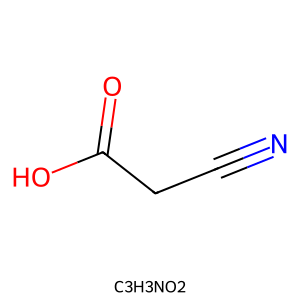

In [241]:
img

In [242]:
img.save('data/images/{}.png'.format(mf))

In [243]:
for idx in range(len(df)):
    smiles = df['smiles'][idx]
    mf = df['mf'][idx]
    mol = Chem.MolFromSmiles(smiles)
    img = Draw.MolToImage(mol,legend = mf)
    img.save('data/images/{}.png'.format(mf))